# Arbeitsblatt 3: Supportvektormaschinen mit Scikit Learn, Random Forests und Boosting

## 1. Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket *Scikit Learn*, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter `http://scikit-learn.org/stable/tutorial/basic/tutorial.html` an, um die grundsätzliche Syntax zu erlernen.

Aufgaben:

a) Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion `digits = load_digits()`. Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes `digits.DESCR`. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix `digits.data`, die zugehörigen Labels stehen in dem Vektor `digits.target`. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

In [8]:
### 3.1. a)
from sklearn import datasets

# Get the data
digits = datasets.load_digits()

In [9]:
print("Basic Info: ")
print(digits.DESCR)

Basic Info: 
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counte

In [10]:
import numpy as np  

print(f"""Dataset Info:
Number of Labels:\t{len(np.unique(digits.target))}
Labels:\t\t{np.unique(digits.target)}
Number of Datasets:\t{len(digits.data)}
Dimensions:\t8x8 = {len(digits.data[0])}
""")

Dataset Info:
Number of Labels:	10
Labels:		[0 1 2 3 4 5 6 7 8 9]
Number of Datasets:	1797
Dimensions:	8x8 = 64


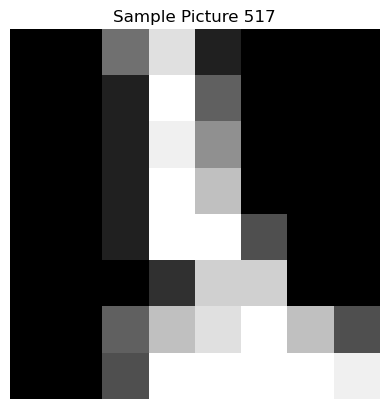

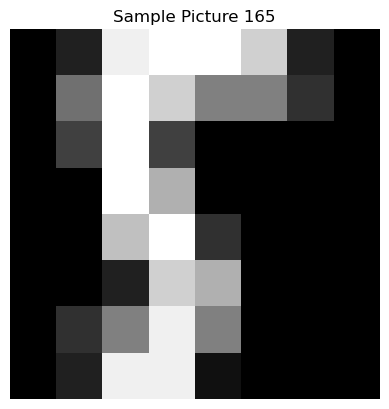

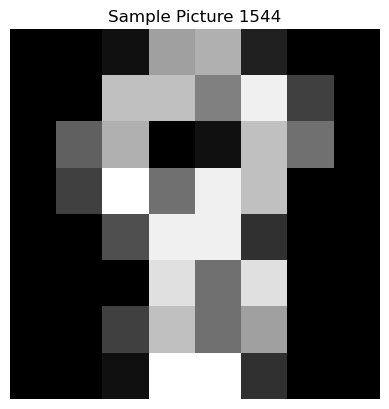

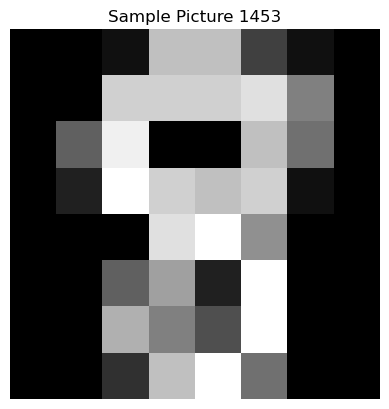

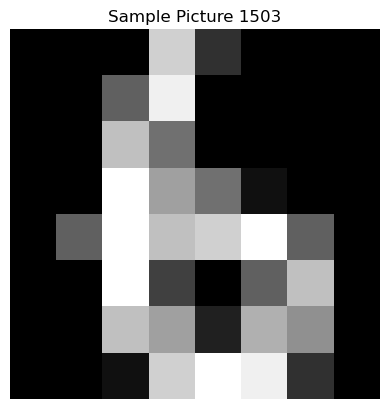

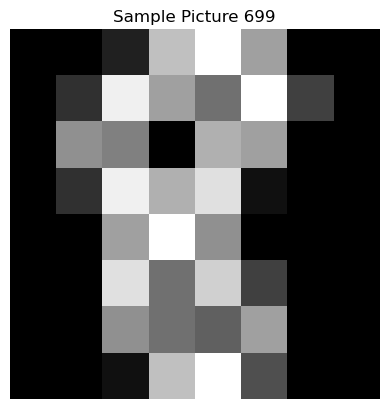

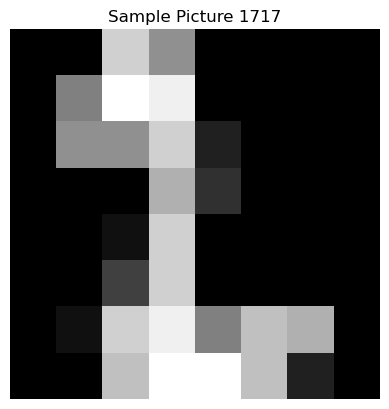

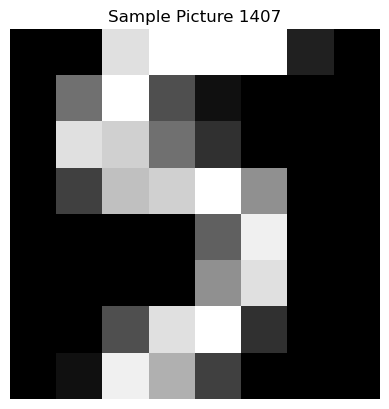

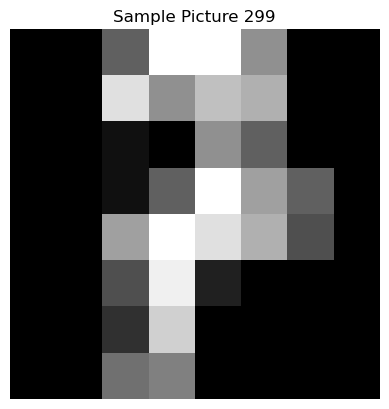

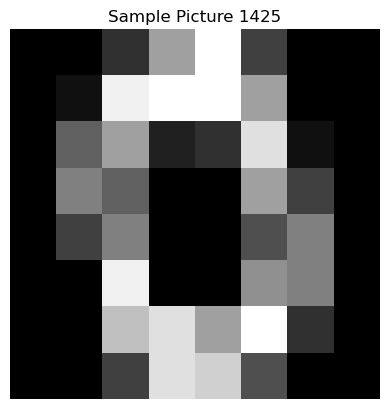

In [11]:
# Select random ten pics
from matplotlib import pyplot as plt
import random  

random_index = []
for _ in range(10):
    random_index.append(random.randint(0, len(digits.data)))

for i in random_index:
    image = digits.data[i].reshape((8, 8))
    plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
    plt.title(f"Sample Picture {i}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

b) Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion `sklearn.model_selection.train_test_split()`. Trainieren Sie einen Supportvektor-Klassifikator (Standard in *Scikit Learn* ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, **Treffergenauigkeit**, engl. *Accuracy*) im Trainings- und Testdatensatz mithilfe der Funktion `SVC.score()`. **Underfitting** liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei **Overfitting** liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? Probieren Sie alternativ die SVM-Parameter $\gamma = 0.001$ und $C = 100$ und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?

In [12]:
### 3.1 b)
from sklearn import model_selection
from sklearn import svm

# random split
train_data, test_data, train_label, test_label = model_selection.train_test_split(digits.data, digits.target, test_size=0.25)

In [13]:
clf = svm.SVC(C=1.0, gamma=0.015, kernel="rbf")
clf.fit(train_data, train_label)
    
train_score = round(clf.score(train_data, train_label), 3)
test_score = round(clf.score(test_data, test_label), 3)
print(f"""
Score on Train:\t{train_score}
Score on Test:\t{test_score}
""")

# ANMERKUNG: Grenzen über die Konfidenzintervalle bestimmen
if train_score < 0.6:
    print("=> Underfitting")
elif (test_score / train_score) < 0.7:
    print("=> Overfitting")


Score on Train:	1.0
Score on Test:	0.407

=> Overfitting


In [14]:
clf = svm.SVC(C=100.0, gamma=0.001, kernel="rbf")
clf.fit(train_data, train_label)
    
train_score = round(clf.score(train_data, train_label), 3)
test_score = round(clf.score(test_data, test_label), 3)
print(f"""
With better parameters:\n
Score on Train:\t{round(clf.score(train_data, train_label), 3)}
Score on Test:\t{round(clf.score(test_data, test_label), 3)}
""")

if train_score < 0.6:
    print("=> Underfitting")
elif (test_score / train_score) < 0.7:
    print("=> Overfitting")


With better parameters:

Score on Train:	1.0
Score on Test:	0.989


Vergleich der Parameter: die neuen Parameter sorgen für ein besseres Ergebnis OHNE Underfitting oder Overfitting.

Abhängigkeit von Zufallssplit:
    bei Parametern 1: ca. +/- 0.1 (ein Zehntel)
    bei Parametern 2: ca. +/- 0.01 (ein Hundertstel) => sehr robust